In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [2]:
data = pd.read_csv('conference\Sample9.csv')
data.head()


,Crash identifier,Crash severity,Crash year,Day of the week,Month of year,Is weekend,Holiday,Is in school zone,Intersection,On state highway,...,Primary weather,Secondary weather,Alcohol Suspected,Drugs Involved,Driver contribution,Licence type,Licence status,Road usage type,Road user age,Gender
0,201955537,Minor Crash,2019,Monday,April,No,NaN,Yes,Yes,No,...,Fine,Null,Not Suspected,Not suspected,No Contribution,Full,Current,Car/Wagon,54,Female
1,201950999,Minor Crash,2019,Tuesday,February,No,NaN,No,No,No,...,Fine,Null,Suspected-Tested,Not suspected,No Contribution,Full,Current,Car/Wagon,82,Female
2,201950713,Minor Crash,2019,Saturday,February,Yes,NaN,Yes,Yes,No,...,Fine,Null,Not Suspected,Not suspected,No Contribution,Full,Current,Car/Wagon,63,Female
3,201952964,Minor Crash,2019,Tuesday,April,No,NaN,Yes,Yes,No,...,Fine,Null,Suspected-Tested,Not suspected,No Contribution,Full,Cancelled,Car/Wagon,28,Male
4,201959348,Non-Injury Crash,2019,Monday,February,No,NaN,Yes,Yes,No,...,Fine,Null,Not Suspected,Not suspected,No Contribution,Full,Current,SUV,23,Male


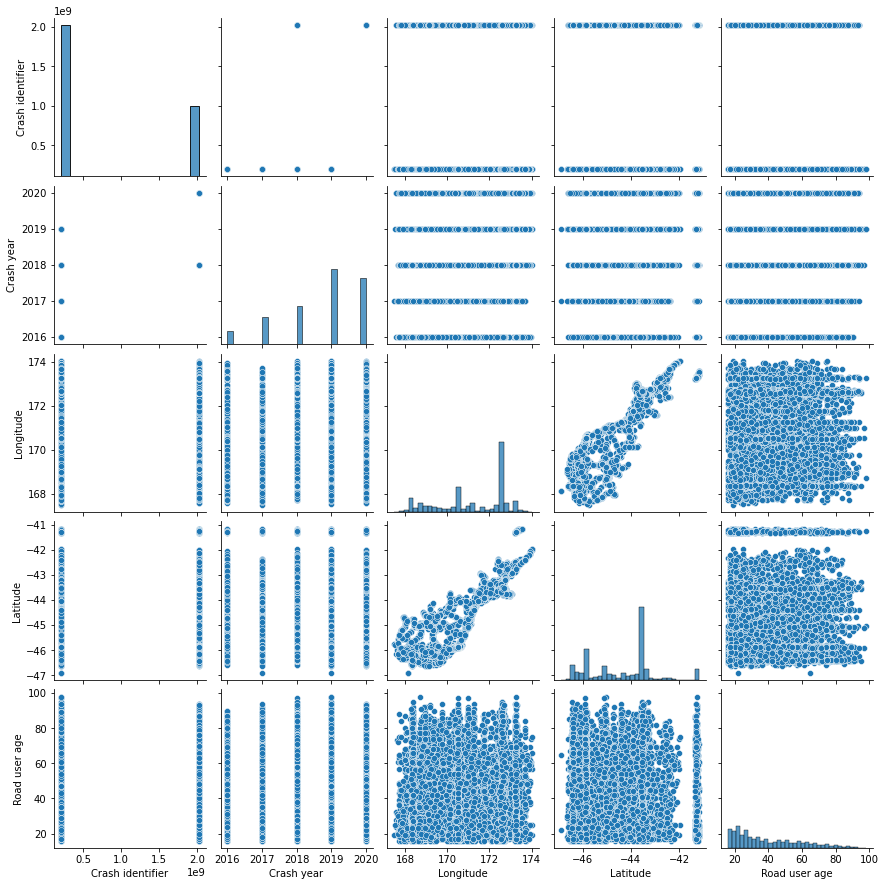

In [3]:
sns.pairplot(data)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

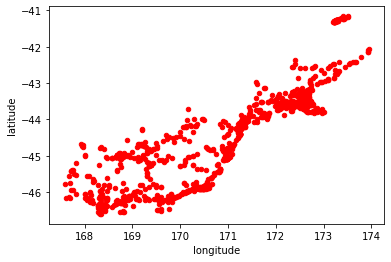

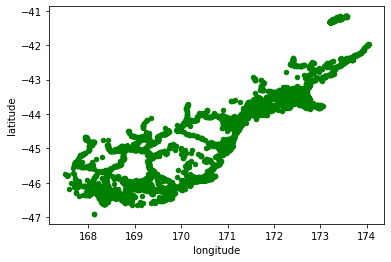

In [4]:
df = pd.DataFrame(columns=('CrashSeverity', 'longitude','latitude'))
df2 = pd.DataFrame(columns=('CrashSeverity', 'longitude','latitude'))
cs=0
cns=0
for i in range(data.shape[0]):
    if (data.iloc[i][1]=='Fatal Crash'or data.iloc[i][1]=='Serious Crash' ):
        df.loc[cs] = [data.iloc[i][1], data.iloc[i][11],data.iloc[i][12]]
        cs+=1
    else:
        df2.loc[cns] = [data.iloc[i][1], data.iloc[i][11],data.iloc[i][12]]
        cns+=1
        
df.plot(kind="scatter", x="longitude", y="latitude", color='red')
df2.plot(kind="scatter", x="longitude", y="latitude", color='green')

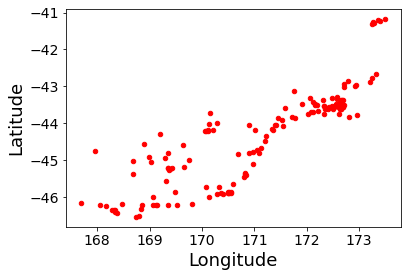

In [5]:
dff = pd.DataFrame(columns=('CrashSeverity', 'longitude','latitude'))
cs=0
for i in range(data.shape[0]):
    if (data.iloc[i][1]=='Fatal Crash'):
        dff.loc[cs] = [data.iloc[i][1], data.iloc[i][11],data.iloc[i][12]]
        cs+=1
dff.plot(kind="scatter", x="longitude", y="latitude", color='red',fontsize=14)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.show()

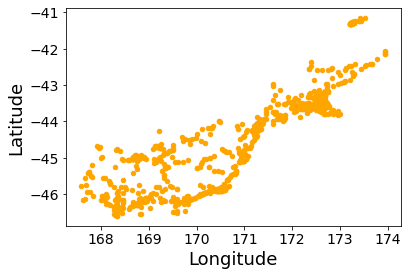

In [6]:
dff1 = pd.DataFrame(columns=('CrashSeverity', 'longitude','latitude'))
cs=0
for i in range(data.shape[0]):
    if (data.iloc[i][1]=='Serious Crash'):
        dff1.loc[cs] = [data.iloc[i][1], data.iloc[i][11],data.iloc[i][12]]
        cs+=1
dff1.plot(kind="scatter", x="longitude", y="latitude", color='orange',fontsize=14)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.show()

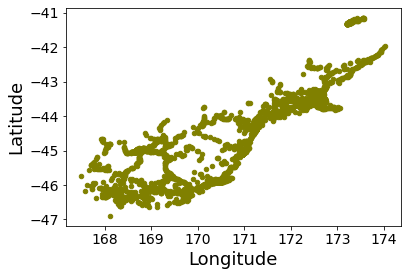

In [7]:
dff2 = pd.DataFrame(columns=('CrashSeverity', 'longitude','latitude'))
cs=0
for i in range(data.shape[0]):
    if (data.iloc[i][1]=='Minor Crash'):
        dff2.loc[cs] = [data.iloc[i][1], data.iloc[i][11],data.iloc[i][12]]
        cs+=1
dff2.plot(kind="scatter", x="longitude", y="latitude", color='olive',fontsize=14)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.show()

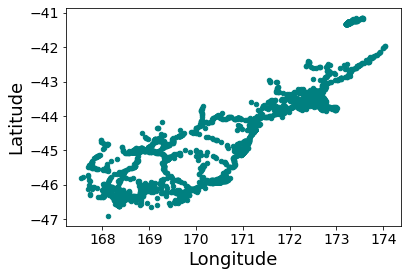

In [8]:
dff3 = pd.DataFrame(columns=('CrashSeverity', 'longitude','latitude'))
cs=0
for i in range(data.shape[0]):
    if (data.iloc[i][1]=='Non-Injury Crash'):
        dff3.loc[cs] = [data.iloc[i][1], data.iloc[i][11],data.iloc[i][12]]
        cs+=1
dff3.plot(kind="scatter", x="longitude", y="latitude", color='teal',fontsize=14)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.show()

In [10]:
data2=data
data2["Crash severity"].replace({"Non-Injury Crash": 1, "Minor Crash": 2, "Serious Crash": 3, "Fatal Crash": 4}, inplace=True)
data2["Is weekend"].replace({"Yes": 1, "No": 0}, inplace=True)
data2["Intersection"].replace({"Yes": 1, "No": 0}, inplace=True)
data2["On state highway"].replace({"Yes": 1, "No": 0}, inplace=True)
data2["Is in school zone"].replace({"Yes": 1, "No": 0}, inplace=True)
data2["Urban or open speed zone"].replace({"Open": 1, "Urban": 0}, inplace=True)

data2["Road curvature"].replace({"Curved": 1, "Straight": 0}, inplace=True)
data2["Gradient"].replace({"Hill Road": 1, "Flat": 0}, inplace=True)
data2["Surface type"].replace({"Sealed": 1, "Unsealed": 2,"End of seal": 3}, inplace=True)
data2["Primary surface condition"].replace({"Dry": 1, "Wet": 2,"Ice or Snow": 3}, inplace=True)
data2["Natural Light"].replace({"Bright sun": 1, "Overcast": 2, "Twilight": 3, "Dark": 4}, inplace=True)
data2["Primary weather"].replace({"Fine": 1, "Hail or Sleet": 2, "Heavy rain": 3, "Light rain": 4,"Mist or Fog": 5, "Snow": 6}, inplace=True)
data2["Alcohol Suspected"].replace({"Not Suspected": 0, "Suspected-Tested": 1, "Suspected - Not Tested": 2}, inplace=True)
data2["Drugs Involved"].replace({"Not suspected": 0,  "Suspected - Not Tested": 1, "Suspected - Tested":2}, inplace=True)
data2["Licence type"].replace({"Full": 1, "Learner": 2, "Never Licensed": 3, "Overseas": 4,"Restricted": 5, "Wrong class": 6}, inplace=True)
data2["Licence status "].replace({"Current": 1, "Limited": 2, "Cancelled": 3, "Disqualified": 4,"Expired": 5, "Suspended": 6,"Zero alcohol status": 7}, inplace=True)
data2["Junction type"].replace({"Nil (Default)": 1, "Crossroads": 2, "End of road": 3, "Multileg": 4,"Roundabout": 5, "T Junction": 6,"Y Junction": 7,"Driveway":8}, inplace=True)
data2["Gender"].replace({"Male": 1, "Female": 2}, inplace=True)
#data2["Junction type"]

In [14]:
#DC_Index=data.columns.get_loc("Licence type")
#print(DC_Index)
#for x in range (data2.shape[13]):
 #   print(data2.iloc[x][13])

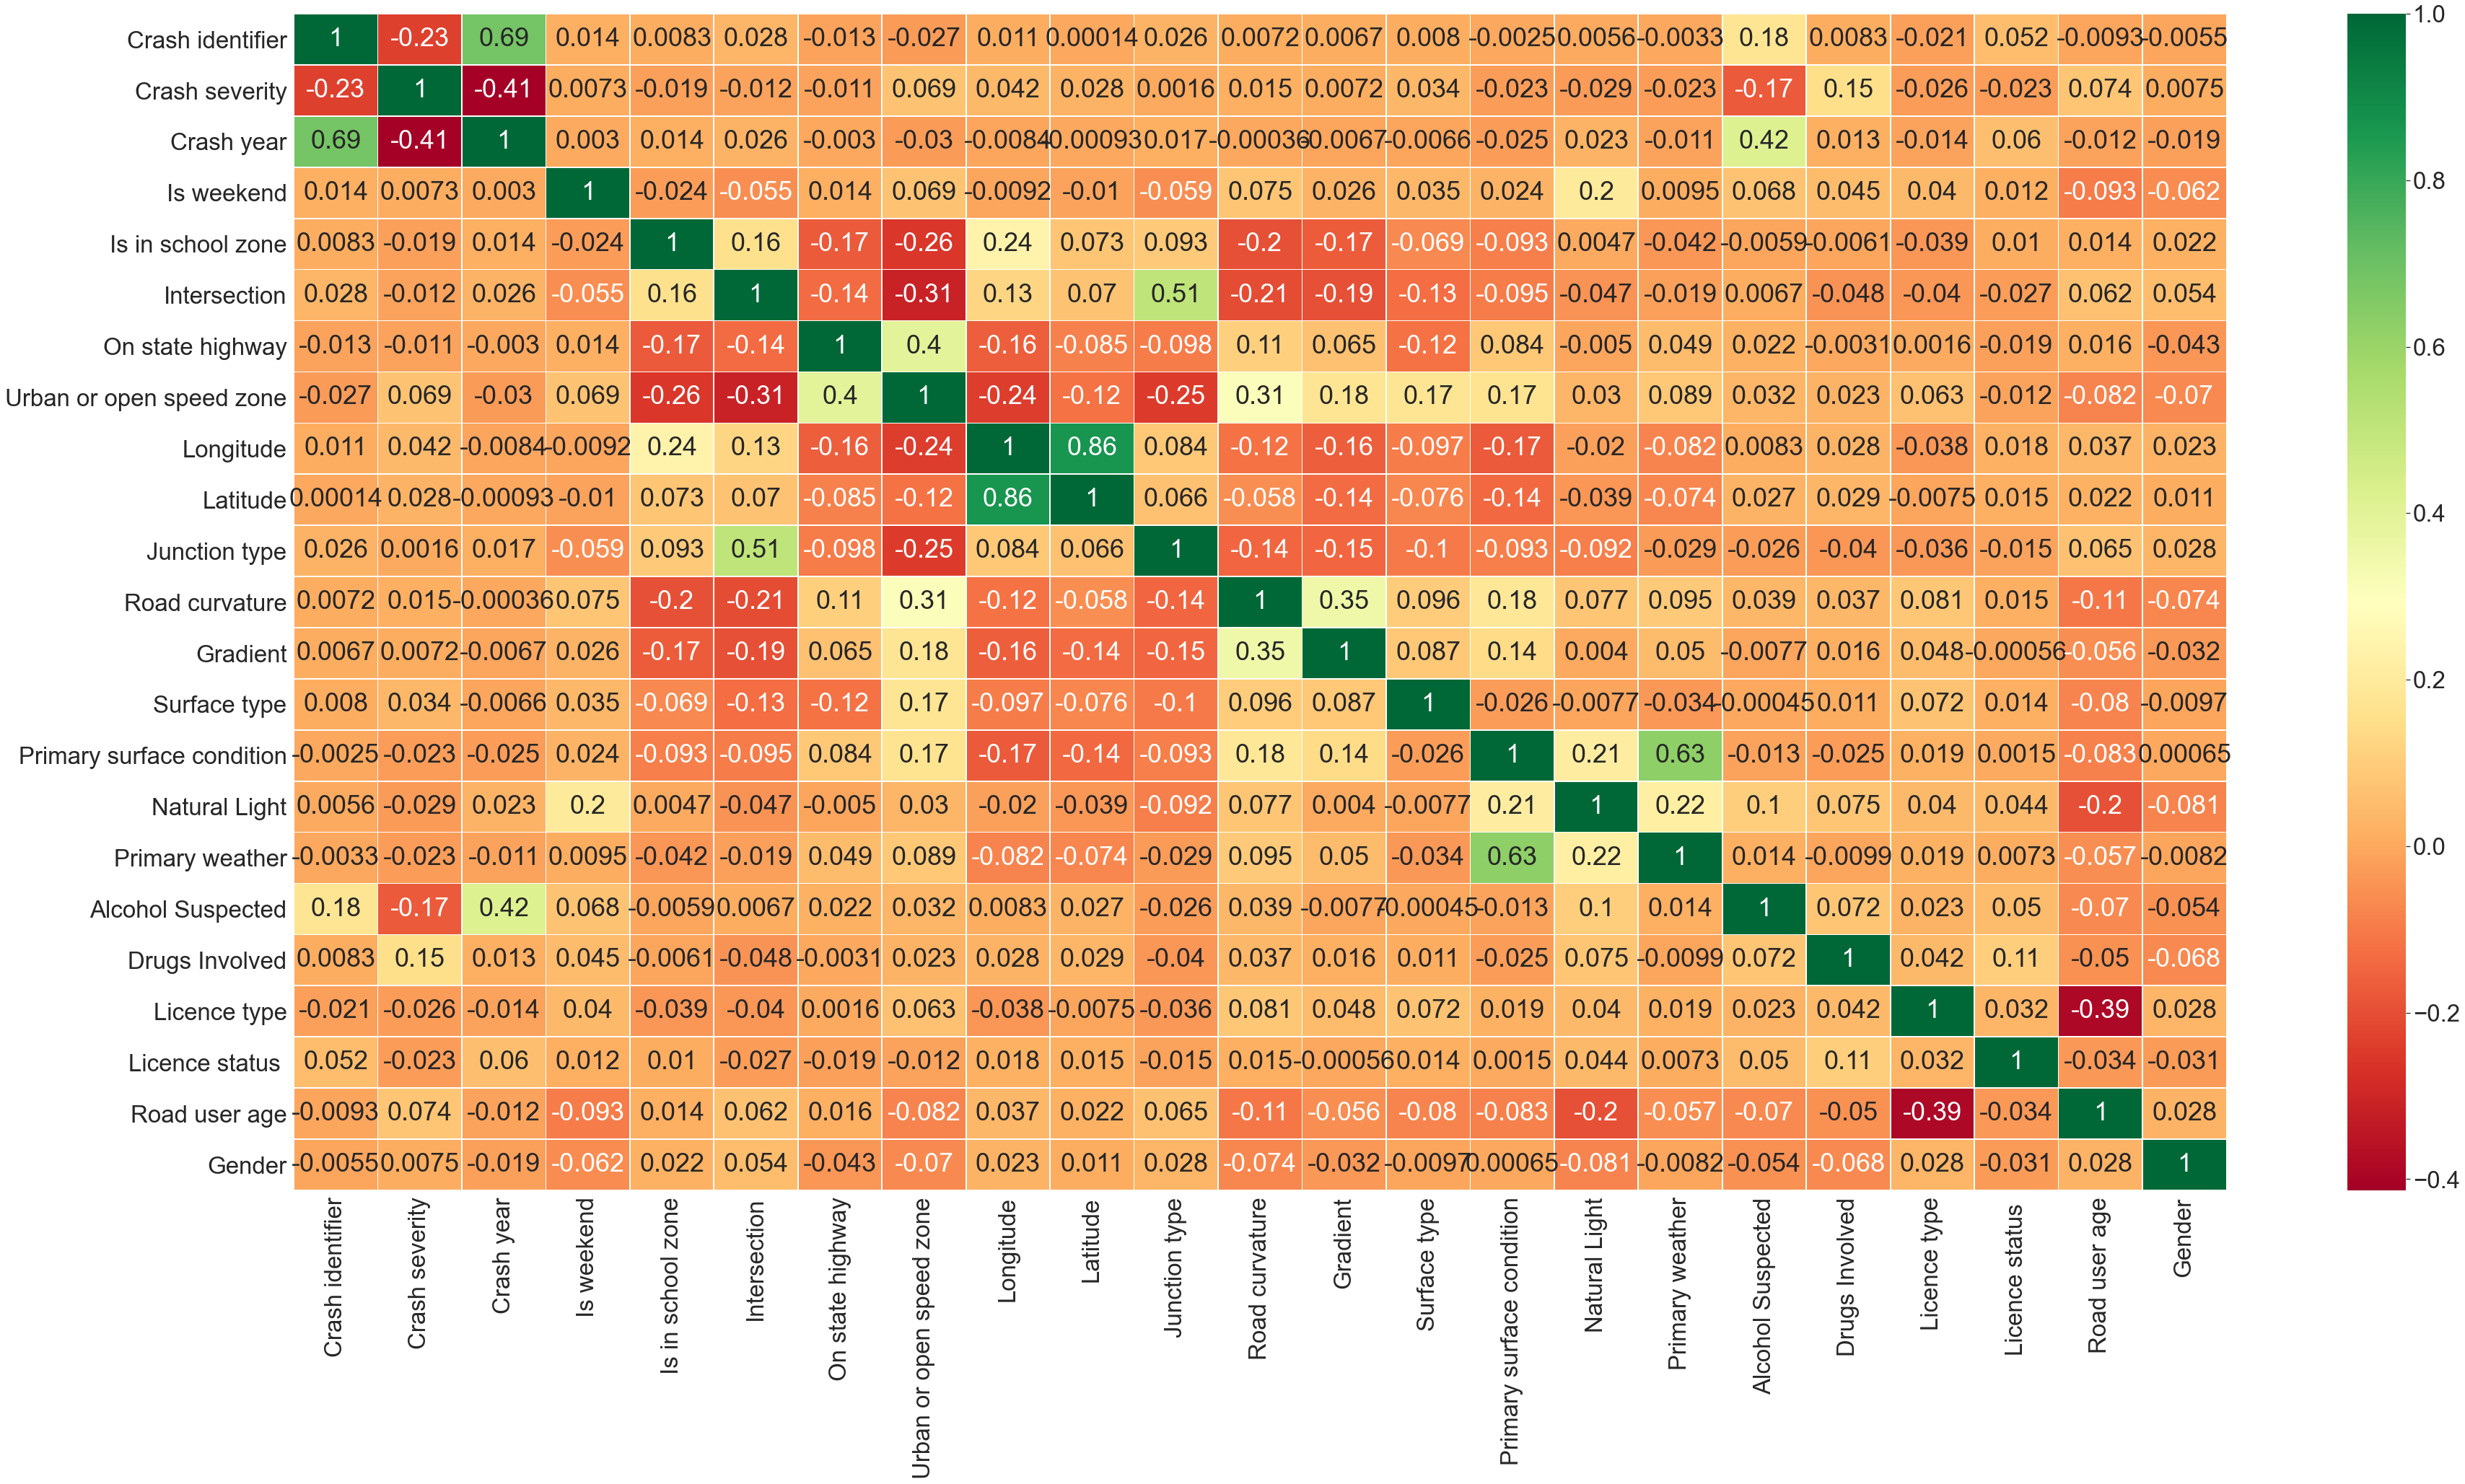

In [24]:
plt.figure(figsize=(60,30))
sns.heatmap(data2.corr(), annot=True,linewidths=.7,cmap="RdYlGn")
sns.set(font_scale=4)
plt.show()

In [36]:
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
accident_table = data2.groupby(['Crash year', 'Day of the week']).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2016,90,129,157,121,117,115,110
2017,242,220,274,240,254,243,225
2018,291,333,414,337,396,323,299
2019,579,617,788,699,727,674,625
2020,519,622,629,611,574,586,595


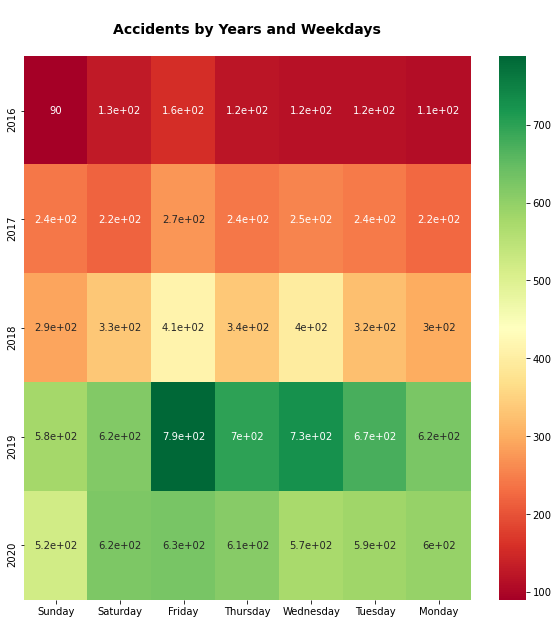

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(accident_table, cmap='RdYlGn',annot=True)
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

In [183]:


data2["Crash severity"].replace({"Non Injury Crash": 1, "Minor Crash": 1, "Serious Crash": 2, "Fatal Crash": 2}, inplace=True)
data2["Crash severity"].replace({1: "Grievous", 2: "Non-Grievous"}, inplace=True)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
accident_table2 = data2.groupby(['Crash severity', 'Day of the week']).size()
accident_table2 = accident_table2.rename_axis(['Crash severity', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table2

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Crash severity,,,,,,,
Grievous,1521,1678,2010,1761,1849,1735,1650
Non-Grievous,200,243,252,247,219,206,204


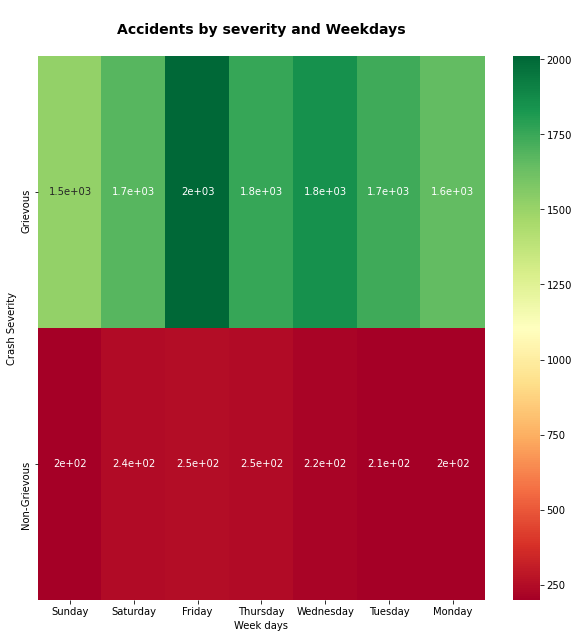

In [184]:
plt.figure(figsize=(10,10))
sns.heatmap(accident_table2, cmap='RdYlGn',annot=True)
plt.title('\nAccidents by severity and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('Week days')
plt.ylabel('Crash Severity');